# Predicting sentiment from product reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

## Read data
Loading reviews for a set of baby products in Amazon.

In [2]:
product = pd.read_csv('amazon_baby.csv')

## Data Exploration
Data includes the product name, the review text and the rating of the review.

In [3]:
product.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
name      183213 non-null object
review    182702 non-null object
rating    183531 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


### Create a new column called "text length" which is the number of words in the text column.

In [5]:
product['text length'] =product['review'].str.len()
product.head()

,name,review,rating,text length
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,452.0
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,158.0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,143.0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,390.0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,405.0


### Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. 

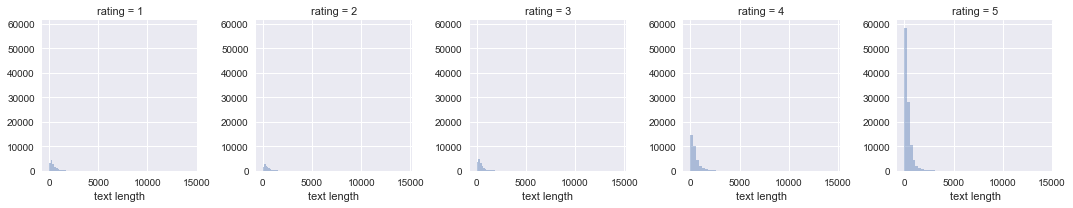

In [6]:
g = sns.FacetGrid(data=product, col='rating')
g.map(sns.distplot, 'text length', kde=False)

### Create a boxplot of text length for each star category.

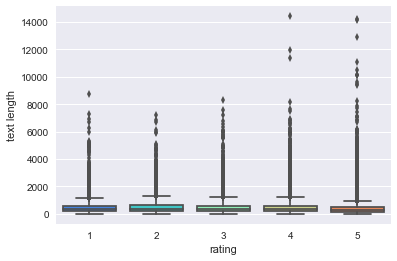

In [7]:
sns.boxplot(data=product, x='rating', y='text length', palette='rainbow')

### Create a countplot of the number of occurrences for each type of star rating.

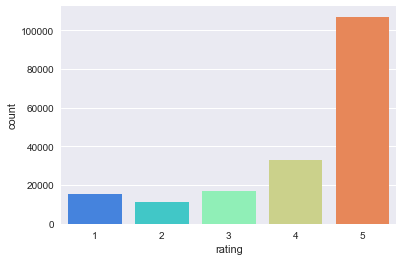

In [8]:
sns.countplot(data=product, x='rating', palette='rainbow')

## NLP Classification Task
### Define what's a positive and a negative sentiment
We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment. Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.

In [9]:
#ignore all 3* reviews
product = product[product['rating'] != 3]

In [ ]:
product['sentiment'] = np.where(product['rating'] >=4, 1,0)

In [11]:
product.head()

,name,review,rating,text length,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,158.0,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,143.0,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,390.0,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,405.0,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,495.0,1


In [ ]:
product.dropna(inplace=True)

In [13]:
X = product['review']
y = product['sentiment']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [15]:
X = cv.fit_transform(X)

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Using Naive Bayes classifier model 

In [17]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
predictions = nb.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 5439  2540]
 [ 2490 39235]]


             precision    recall  f1-score   support

          0       0.69      0.68      0.68      7979
          1       0.94      0.94      0.94     41725

avg / total       0.90      0.90      0.90     49704



## Text processing

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()), # train on TF-IDF vectors w/ Naive Bayes classifier
    ])

In [21]:
from sklearn.model_selection import train_test_split
X = product['review']
y = product['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Using pipeline and bring in tf-idf

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [23]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 5439  2540]
 [ 2490 39235]]


             precision    recall  f1-score   support

          0       0.69      0.68      0.68      7979
          1       0.94      0.94      0.94     41725

avg / total       0.90      0.90      0.90     49704



In [24]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()), # train on TF-IDF vectors w/ Naive Bayes classifier
    ])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 5437  2542]
 [  867 40858]]


             precision    recall  f1-score   support

          0       0.86      0.68      0.76      7979
          1       0.94      0.98      0.96     41725

avg / total       0.93      0.93      0.93     49704



### logistic regression model seems to outperform others!